<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-06-06-multivariate-statistics-partial-least-squares-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6. Partial Least Squares (PLS) Regression

This section we will discuss Partial Least Squares (PLS) regression, a powerful technique for modeling relationships between predictors and responses in high-dimensional datasets. We will explore the key features, mathematical framework, and applications of PLS regression, along with a step-by-step guide to implementing PLS from scratch in R. Let's dive in!


## Overview

Partial Least Squares (PLS) regression is a statistical method used for modeling relationships between a set of independent variables (predictors) and dependent variables (responses). It is particularly useful when the predictors are highly collinear, or when there are more predictors than observations.

PLS regression combines features of principal component analysis (PCA) and multiple regression. Here's a breakdown:

### Key Features

1. **Dimensionality Reduction**: PLS identifies a smaller number of latent variables (or components) that are linear combinations of the original predictors. These latent variables capture the maximum covariance between the predictors and the responses.
   
2. **Handles Multicollinearity**: By using these latent variables, PLS avoids issues that arise from multicollinearity in the predictors, which can complicate traditional regression methods.

3. **Simultaneous Decomposition**: PLS decomposes both the predictors and responses simultaneously, ensuring that the components explain as much variance as possible in both.

4. **Predictive Power**: PLS focuses on maximizing the predictive relationship between predictors and responses, making it suitable for situations where prediction accuracy is the primary goal.

### How PLS Regression Works

1. **Centering and Scaling**: The data is preprocessed to ensure all variables have zero mean and unit variance.
2. **Latent Variable Extraction**:
   - PLS constructs latent variables (components) as linear combinations of predictors that maximize the covariance with the responses.
3. **Regression**:
   - Once the latent variables are extracted, a standard linear regression is performed using these components to predict the response variable(s).

### Mathematical Farmework

The mathematical framework behind Partial Least Squares (PLS) regression involves decomposing the predictors and responses into latent components to model the relationship between them effectively. Here's a step-by-step breakdown of the math:


- Let $\mathbf{X} \in \mathbb{R}^{n \times p}$: Matrix of predictors (independent variables), where $n$ is the number of samples and $p$ is the number of predictors.
- Let $\mathbf{Y} \in \mathbb{R}^{n \times q}$: Matrix of responses (dependent variables), where $q$ is the number of response variables.
- The goal is to find latent components that explain the relationship between $\mathbf{X}\) and \(\mathbf{Y}$.


PLS finds a set of **latent variables (or components)** by decomposing $\mathbf{X}$ and $\mathbf{Y}$ into:

$$ \mathbf{X} = \mathbf{T} \mathbf{P}^\top + \mathbf{E} $$

$$ \mathbf{Y} = \mathbf{U} \mathbf{Q}^\top + \mathbf{F} $$

where:

- $\mathbf{T} \in \mathbb{R}^{n \times h}$: Scores matrix (latent variables for $\mathbf{X}$).
- $\mathbf{U} \in \mathbb{R}^{n \times h}$: Scores matrix (latent variables for $\mathbf{Y}$).
- $\mathbf{P} \in \mathbb{R}^{p \times h}$: Loadings matrix for $\mathbf{X}$.
- $\mathbf{Q} \in \mathbb{R}^{q \times h}$: Loadings matrix for $\mathbf{Y}$.
- $\mathbf{E}$ and $\mathbf{F}$: Residual matrices for $\mathbf{X}$ and $\mathbf{Y}$, respectively.
- $h$: Number of components.


The primary objective of PLS is to find latent components such that the covariance between the scores $\mathbf{T}$ and $\mathbf{U}$ is maximized:

$$ \text{maximize } \text{Cov}(\mathbf{T}, \mathbf{U}) \quad \text{subject to constraints} $$

This ensures that the components extracted capture the shared variance between $\mathbf{X}$ and $\mathbf{Y}$.

PLS is an iterative process. At each step:
1. **Find weight vectors**:
   - Compute weight vectors \(\mathbf{w}_X\) and \(\mathbf{w}_Y\) such that:
     
     $$ \mathbf{w}_X = \text{argmax}_{\mathbf{w}_X} \, \text{Cov}(\mathbf{X}\mathbf{w}_X, \mathbf{Y}\mathbf{w}_Y) $$
   
   - Normalize $\mathbf{w}_X$ and $\mathbf{w}_Y$.

2. **Compute scores**:
   - $\mathbf{t} = \mathbf{X} \mathbf{w}_X$, the score vector for $\mathbf{X}$.
   - $\mathbf{u} = \mathbf{Y} \mathbf{w}_Y$, the score vector for $\mathbf{Y}$.

3. **Regress $\mathbf{X}$ and $\mathbf{Y}$ onto the scores**:
   - Compute $\mathbf{p}$ and $\mathbf{q}$ (loadings):
     
     $$ \mathbf{p} = \mathbf{X}^\top \mathbf{t}, \quad \mathbf{q} = \mathbf{Y}^\top \mathbf{u} $$
4. **Deflate \(\mathbf{X}\) and \(\mathbf{Y}\)**:
   - Remove the contribution of the current component:
     
     $$  \mathbf{X} \leftarrow \mathbf{X} - \mathbf{t} \mathbf{p}^\top, \quad \mathbf{Y} \leftarrow \mathbf{Y} - \mathbf{t} \mathbf{q}^\top $$

5. **Repeat**:

   - Continue until the desired number of components $h$ is extracted or until the residuals are sufficiently small.


After extracting the latent components, the PLS regression model is built using the relationship:

$$ \mathbf{Y} = \mathbf{X} \mathbf{B} + \mathbf{F} $$

where $\mathbf{B}$ is the regression coefficient matrix given by:

$$ \mathbf{B} = \mathbf{W} (\mathbf{P}^\top \mathbf{W})^{-1} \mathbf{Q}^\top $$

with $\mathbf{W}$ being the matrix of weight vectors for $\mathbf{X}$.


### Applications

- **Chemometrics**: Analyzing chemical data (e.g., spectroscopy).
- **Genomics**: Linking gene expression data to phenotypic outcomes.
- **Econometrics**: Modeling complex economic systems.
- **Machine Learning**: When feature selection or dimensionality reduction is needed.

### Advantages

- Effective for datasets with more variables than observations.
- Reduces the impact of multicollinearity.
- Simultaneously models predictors and responses.

### Limitations

- Interpretation of components can be challenging.
- May overfit if too many components are chosen.
- Sensitive to preprocessing (e.g., scaling).

## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314975 sha256=625e09f974ca78167b004e12156586ae4ca528bc674d8769129f82efab7f1141
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Partial Least Squares (PLS) Regression from Scratch

Building a Partial Least Squares (PLS) model from scratch in R without relying on pre-existing packages can be a complex task. However, I can guide you through creating a basic implementation to predict soil carbon percentage using synthetic spectroscopic data within the specified wavelength range (300-2500 nm).

Here’s a breakdown of the process:

1. **Generate Synthetic Data**: Create synthetic spectroscopic data $X$ and response variable $Y$.
2. **PLS Model Implementation**: Write a custom PLS function to fit a PLS regression model.
3. **Model Training and Validation**:
    - Use cross-validation to optimize the number of components.
    - Split the data into a 70% training set and 30% test set for hold-out validation.


###  Generate data

First we will generate synthetic data for 100 samples and 2201 wavelengths (300-2500 nm in 1 nm intervals). We will create a strong correlation structure between the predictors (X) and the response variable (Y) to demonstrate the effectiveness of PLS regression.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Generate synthetic data for 200 samples and 2201 wavelengths (300-2500 nm in 1 nm intervals)
n_samples <- 100
wavelengths <- 250:2500
n_features <- length(wavelengths)

# Generate synthetic spectral data (X) with a strong correlation structure
X <- matrix(rnorm(n_samples * n_features), nrow = n_samples, ncol = n_features)

# Define a true relationship between X and Y
# Use a few specific wavelengths to create Y with a high correlation to X
true_coefficients <- runif(50, min = 0.5, max = 1.5)  # Random coefficients for a subset of wavelengths
selected_columns <- seq(1, n_features, length.out = 50)
Y <- X[, selected_columns] %*% true_coefficients + rnorm(n_samples, sd = 0.1)  # Small noise added

### Implement PLS Regression

We will now implement the PLS regression algorithm using the NIPALS (Non-linear Iterative Partial Least Squares) algorithm. This algorithm iteratively extracts latent components that maximize the covariance between the predictors and responses. We will define functions for PLS regression, cross-validation to find the optimal number of components, and model evaluation on a test set.

In [ ]:
%%R
# Function to perform PLS using NIPALS algorithm (same as before)
pls_nipals <- function(X, Y, n_components) {
  n <- nrow(X)
  p <- ncol(X)

  # Center X and Y
  X <- scale(X, center = TRUE, scale = FALSE)
  Y <- scale(Y, center = TRUE, scale = FALSE)

  T <- matrix(0, n, n_components)  # Scores for X
  U <- matrix(0, n, n_components)  # Scores for Y
  P <- matrix(0, p, n_components)  # Loadings for X
  Q <- numeric(n_components)       # Loadings for Y
  W <- matrix(0, p, n_components)  # Weights for X

  for (h in 1:n_components) {
    # Initialize with a random column of Y
    u <- Y[, 1]

    for (iter in 1:100) {
      # Calculate weights for X
      w <- crossprod(X, u) / sum(u^2)
      w <- w / sqrt(sum(w^2))  # Normalize weight vector

      # Calculate the scores for X
      t <- X %*% w

      # Calculate the loading for Y
      q <- crossprod(Y, t) / sum(t^2)

      # Calculate the scores for Y
      u <- Y %*% q / sum(q^2)

      # Check for convergence
      if (sum(abs(u - Y %*% q)) < 1e-6) break
    }

    # Store the results
    T[, h] <- t
    U[, h] <- u
    P[, h] <- crossprod(X, t) / sum(t^2)
    Q[h] <- q
    W[, h] <- w

    # Deflate X and Y
    X <- X - t %*% t(P[, h])       # Deflate X
    Y <- Y - tcrossprod(t, q)      # Corrected deflation of Y
  }

  list(T = T, P = P, Q = Q, W = W)
}

### Cross-Validation and Model Evaluation

We will now perform cross-validation to find the optimal number of components for the PLS model.

In [ ]:
%%R
# Cross-validation function to find optimal number of components (same as before)
cross_validate_pls <- function(X, Y, max_components = 10, k = 5) {
  n <- nrow(X)
  indices <- sample(1:n)
  folds <- split(indices, cut(seq_along(indices), k, labels = FALSE))
  mse <- numeric(max_components)

  for (h in 1:max_components) {
    fold_errors <- numeric(k)
    for (j in 1:k) {
      test_indices <- folds[[j]]
      train_indices <- setdiff(1:n, test_indices)

      X_train <- X[train_indices, ]
      Y_train <- Y[train_indices]
      X_test <- X[test_indices, ]
      Y_test <- Y[test_indices]

      # Fit PLS model with h components
      pls_model <- pls_nipals(X_train, Y_train, h)

      # Predict on test set
      T_test <- scale(X_test, center = TRUE, scale = FALSE) %*% pls_model$W[, 1:h]
      Y_pred <- T_test %*% pls_model$Q[1:h]

      # Calculate MSE for the fold
      fold_errors[j] <- mean((Y_test - Y_pred)^2)
    }
    mse[h] <- mean(fold_errors)
  }

  # Return the number of components with minimum MSE
  list(optimal_components = which.min(mse), mse = mse)
}

# Run cross-validation to find the optimal number of components
cv_results <- cross_validate_pls(X, Y, max_components = 10)
optimal_components <- cv_results$optimal_components
print(paste("Optimal number of components:", optimal_components))

[1] "Optimal number of components: 1"


### Model Training and Evaluation

Finally, we will split the data into training and testing sets, train the PLS model with the optimal number of components, and evaluate its performance on the test set.

In [ ]:
%%R
## Split data into 70% training and 30% testing
set.seed(123)
train_indices <- sample(1:n_samples, size = 0.7 * n_samples)
test_indices <- setdiff(1:n_samples, train_indices)

X_train <- X[train_indices, ]
Y_train <- Y[train_indices]
X_test <- X[test_indices, ]
Y_test <- Y[test_indices]

# Train PLS model with optimal components on training data
pls_model <- pls_nipals(X_train, Y_train, optimal_components)

In [ ]:
%%R
# Predict on test set
T_test <- scale(X_test, center = TRUE, scale = FALSE) %*% pls_model$W[, 1:optimal_components]
Y_pred <- T_test %*% pls_model$Q[1:optimal_components]

# Calculate Mean Squared Error on test set
test_mse <- mean((Y_test - Y_pred)^2)
print(paste("Test MSE:", test_mse))

[1] "Test MSE: 42.925786099064"


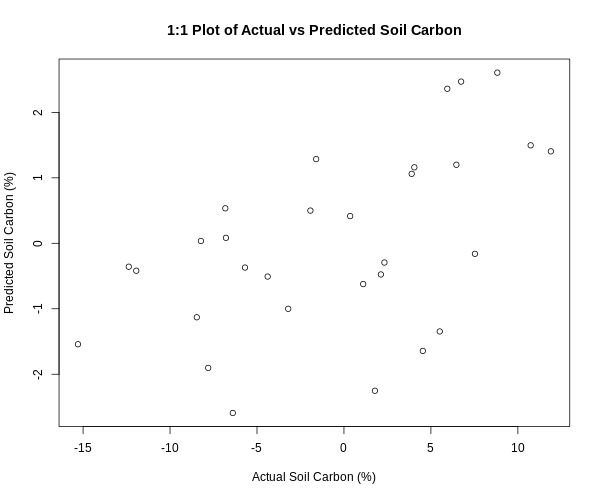

In [ ]:
%%R -w 600 -h 500 -u px
# Plot 1:1 plot of Predicted vs Actual Values
plot(Y_test, Y_pred, xlab = "Actual Soil Carbon (%)", ylab = "Predicted Soil Carbon (%)",
     main = "1:1 Plot of Actual vs Predicted Soil Carbon", xlim = range(Y_test), ylim = range(Y_pred))

## Partial Least Squares (PLS) Regression  in R

In **R**, several packages support Partial Least Squares (PLS) regression, each offering unique features and capabilities. Here’s a list of commonly used packages for PLS regression and their main functionalities:

1.  **`pls`**

    -   **Description**: A comprehensive package for Partial Least Squares regression and Principal Component Regression (PCR).

    -   **Key Functions**:

        -   `plsr()`: For PLS regression.
        -   `pcr()`: For Principal Component Regression.
        -   `validationplot()`: Visualization of cross-validation results.
        -   `predict()`: For predictions.

    -   **Features**:

        -   Supports different types of validation (e.g., cross-validation, test sets).
        -   Handles single and multiple response variables.

    -   **Installation**:

        ``` r
        install.packages("pls")
        ```

    -   **Documentation**: [CRAN - pls](https://cran.r-project.org/web/packages/pls/)

2.  **`plsRglm`**

    -   **Description**: Implements PLS regression for generalized linear models (GLMs).

    -   **Key Functions**:

        -   `plsRglm()`: Fits PLS regression models for GLMs.

    -   **Features**:

        -   Handles non-Gaussian response distributions (e.g., logistic regression, Poisson regression).
        -   Useful for datasets with complex distributions.

    -   **Installation**:

        ``` r
        install.packages("plsRglm")
        ```

    -   **Documentation**: [CRAN - plsRglm](https://cran.r-project.org/web/packages/plsRglm/)

3.  **`chemometrics`**

    -   **Description**: Designed for chemometric data analysis, with PLS and related methods.

    -   **Key Functions**:

        -   `pls1_nipals()`: Implements the NIPALS algorithm for PLS1.
        -   `pls2_nipals()`: Implements the NIPALS algorithm for PLS2.

    -   **Features**:

        -   Focused on chemical data analysis.
        -   Implements basic PLS regression and visualization tools.

    -   **Installation**:

        ``` r
        install.packages("chemometrics")
        ```

    -   **Documentation**: [CRAN - chemometrics](https://cran.r-project.org/web/packages/chemometrics/)

4.  **`plsVarSel`**

    -   **Description**: A package focusing on variable selection in PLS regression.

    -   **Key Functions**:

        -   `vip()`: Variable Importance in Projection scores.

    -   **Features**:

        -   Implements feature selection techniques for PLS.
        -   Helps identify the most relevant predictors.

    -   **Installation**:

        ``` r
        install.packages("plsVarSel")
        ```

    -   **Documentation**: [CRAN - plsVarSel](https://cran.r-project.org/web/packages/plsVarSel/)

  5. 5. **mdatools**

    -   **Description**: A package for multivariate data analysis, including PLS regression.

    -   **Key Functions**:

        -   `pls()`: Fits a PLS regression model.
        -   `plsVarSel()`: Variable selection in PLS.

    -   **Features**:

        -   Supports PLS regression and variable selection.
        -   Useful for multivariate data analysis.

    -   **Installation**:

        ``` r
        install.packages("mdatools")
        ```

    -   **Documentation**: [CRAN - mdatools](https://cran.r-project.org/web/packages/mdatools/)

**Comparison of Packages**

| **Package** | **PLS Method** | **Advanced Methods** | **Visualization** | **Applications** |
|---------------|---------------|---------------|---------------|---------------|
| `pls` | Standard PLS | Cross-validation | Yes | General purpose |
| `plsRglm` | PLS for GLMs | Non-Gaussian responses | Limited | Generalized linear models |
| `chemometrics` | Basic PLS | NIPALS algorithm | Yes | Chemometrics |
| `mdatools` | Basic PCR and PLS | NIPALS algorithm | Yes | Chemometrics |

Choose the package based on your data type, modeling needs, and required visualizations or extensions.

### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
 packages <- c('tidyverse',
              'plyr',
              'patchwork',
              'pls',
              'plsRglm')

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr patchwork       pls   plsRglm 
     TRUE      TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:plsRglm"   "package:pls"       "package:patchwork"
 [4] "package:plyr"      "package:lubridate" "package:forcats"  
 [7] "package:stringr"   "package:dplyr"     "package:purrr"    
[10] "package:readr"     "package:tidyr"     "package:tibble"   
[13] "package:ggplot2"   "package:tidyverse" "package:tools"    
[16] "package:stats"     "package:graphics"  "package:grDevices"
[19] "package:utils"     "package:datasets"  "package:methods"  
[22] "package:base"     


### PLR Regression with `pls` Package

The `pls` package in R provides a comprehensive set of functions for Partial Least Squares (PLS) regression and Principal Component Regression (PCR). It offers a range of features for fitting PLS models, performing cross-validation, and visualizing results. Let's explore how to use the `pls` package to fit a PLS regression model to predict soil carbon percentage from spectroscopic data.

#### Data

We will use the `gasoline` dataset from the `pls` package, which contains  NIR spectra and octane numbers of 60 gasoline samples. The NIR spectra were measured using diffuse reflectance as log(1/R) from 900 nm to 1700 nm in 2 nm intervals, giving 401 wavelengths.

In [ ]:
%%R
# Load data
data('gasoline', lib = 'pls')
names(gasoline)

[1] "octane" "NIR"   



#### Matplot of Spectral Data

Matplot of the NIR spectral data for the gasoline samples. The NIR spectral data consists of 60 samples and 401 variables (wavelengths) in the range of 900-1700 nm.

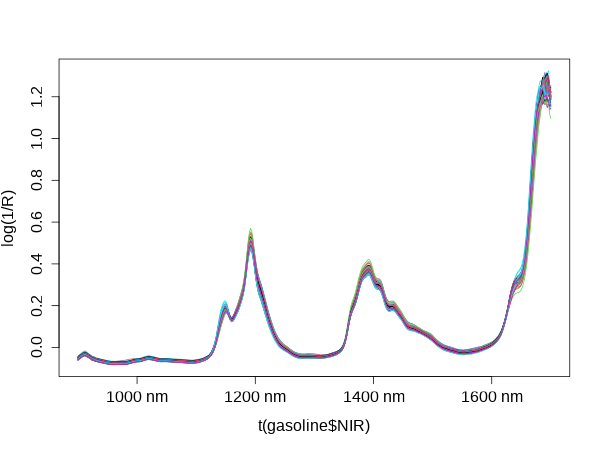

In [ ]:
%%R -w 600 -h 450 -u px
matplot(t(gasoline$NIR), type = "l", lty = 1, ylab = "log(1/R)", xaxt = "n")
ind <- pretty(seq(from = 900, to = 1700, by = 2))
ind <- ind[ind >= 900 & ind <= 1700]
ind <- (ind - 898) / 2
axis(1, ind, colnames(gasoline$NIR)[ind])

#### Split data

Now we will split the data into a training set (50 samples) and a test set (10 samples) for model calibration and validation, respectively.

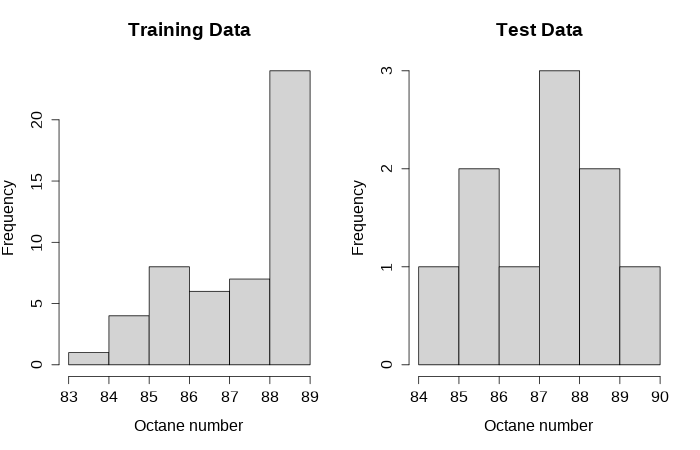

In [ ]:
%%R -w 700 -h 450 -u px
#set the seed
set.seed(19101991)
train <- gasoline[1:50,]
test <- gasoline[51:60,]
# plot the value of the Total Carbon content for both calibration and validation
par(mfrow=c(1,2))
# calibration
hist(train$octane,
      main = "Training Data",
      xlab = "Octane number")
# validation
hist(test$octane,
      main = "Test Data",
      xlab = "Octane number")

#### Fit PLS Model

Let's fit a PLS regression model to predict the octane number from the NIR spectral data. We will use the `plsr()` function from the `pls` package to fit the model. The number of components is set to the maximum number of components in the PLS model. Cross-validation is performed to optimize the number of components.




In [ ]:
%%R
# maximum number of components in the PLS model
maxc <- 10
# generate a PLS model based on calibration data
pls_01<- pls::plsr(octane ~ NIR,
                      data = train,
                      ncomp = maxc,
                      validation = "CV")

In [ ]:
%%R
summary(pls_01)

Data: 	X dimension: 50 401 
	Y dimension: 50 1
Fit method: kernelpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.545    1.321   0.3023   0.2537   0.2544   0.2385   0.2305
adjCV        1.545    1.320   0.2953   0.2519   0.2542   0.2333   0.2265
       7 comps  8 comps  9 comps  10 comps
CV      0.2286   0.2356   0.2500    0.2639
adjCV   0.2247   0.2312   0.2438    0.2558

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         78.17    85.58    93.41    96.06    96.94    97.89    98.38    98.85
octane    29.39    96.85    97.89    98.26    98.86    98.96    99.09    99.16
        9 comps  10 comps
X         99.02     99.19
octane    99.28     99.39



The validation results here are Root Mean Squared Error of Prediction (`RMSEP`). There are two cross-validation estimates: CV is the ordinary `CV` estimate, and `adjCV` is a bias-corrected CV estimate

#### Cross-Validation Plot (RMSEP vs. Components)


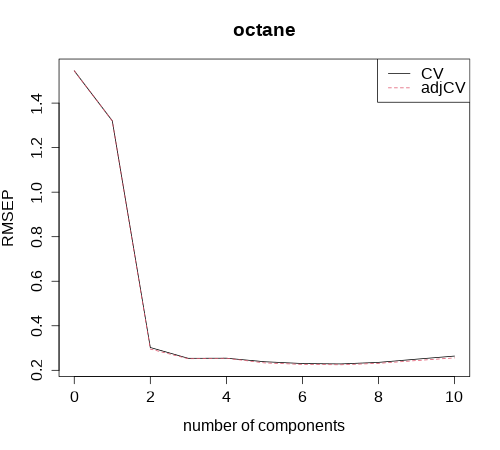

In [ ]:
%%R -w 500 -h 450 -u px
plot(RMSEP(pls_01), legendpos = "topright")

Above plot shows the root mean square error of the prediction (RMSEP, black line) and bias-adjusted RMSEP (red dashed line) obtained by cross-validation against the number of components used in the PLSR model. a 10-fold cross-validation on the calibration data shows that 5 components seem to produce a minimal RMSEP.

#### Plot Cross-validated Predictions

It is also possible to plot directly the predicted and observed values of the soil properties. The predictions are made using the fitted PLS component  using `nc` principal components:

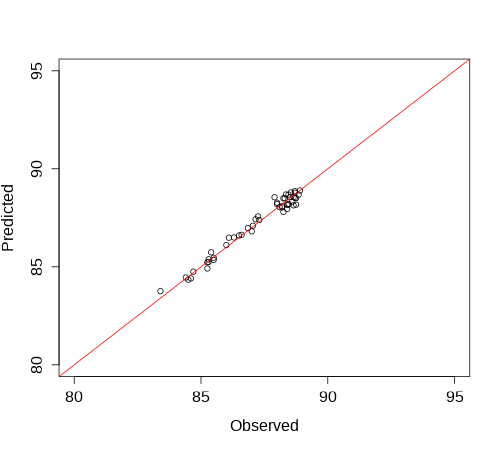

In [ ]:
%%R -w 500 -h 450 -u px
nc <- 4
# plot of cross-validated predictions
plot(pls_01,
    ncomp = nc,
    main = " ",
    xlim = c(80, 95),
    ylim = c(80, 95),
    xlab = "Observed",
    ylab = "Predicted")
abline(0, 1, col = "red")

#### Plot Loadings

The loadings of the PLS model represent the weights of the spectral variables in the prediction of the soil properties. The loadings can be visualized to identify the important spectral regions that contribute to the prediction. Here, we plot the first three loadings of the PLS model.

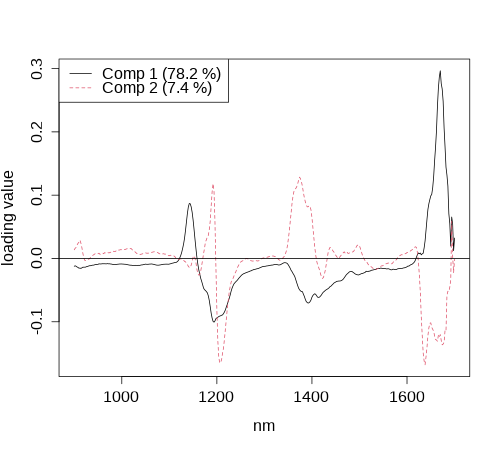

In [ ]:
%%R -w 500 -h 450 -u px
# the three first loadings
plot(pls_01,
      "loadings",
      comps = 1:2,
      legendpos = "topleft",
     labels = "numbers", xlab = "nm")
abline(h = 0)


#### Plot Scores

The scores of the PLS model represent the latent variables that capture the covariance between the spectral variables and the soil properties. The scores can be visualized to identify patterns in the data and assess the relationship between the predictors and responses. Here, we plot the scores of the PLS model.

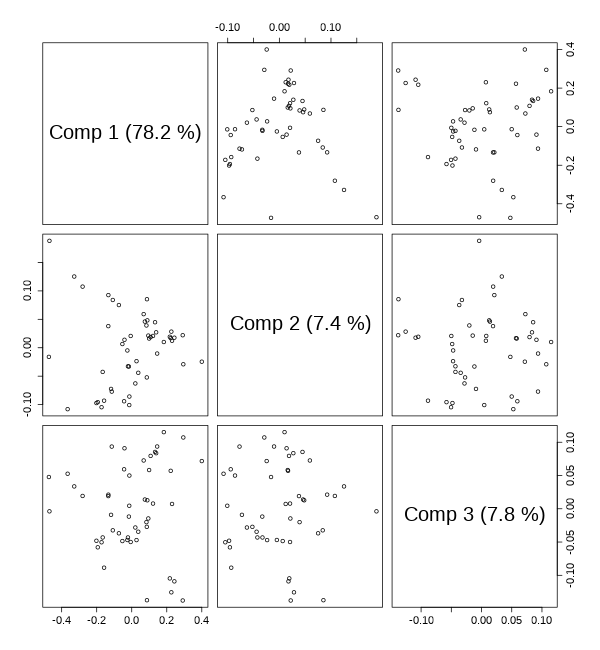

In [ ]:
%%R -w 600 -h 650 -u px
# the three first scores
plot(pls_01,
      "scores",
      comps = 1:3,
      xlab = "Index of the wavelength",
      ylab = "Scores")

#### Plot Coefficients

The coefficients of the PLS model represent the regression coefficients that relate the spectral variables to the soil properties. The coefficients can be visualized to identify the important spectral regions that contribute to the prediction. Here, we plot the coefficients of the PLS model.

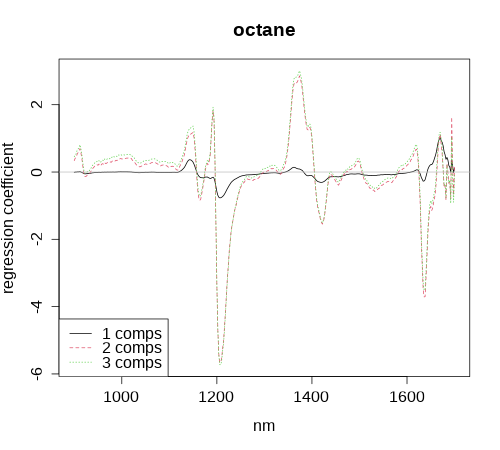

In [ ]:
%%R -w 500 -h 450 -u px
plot(pls_01, plottype = "coef",
     ncomp=1:3, legendpos = "bottomleft",
    labels = "numbers", xlab = "nm")

#### Correlation loadings plot

The correlation loadings plot shows the correlation between the predictors (X) and the responses (Y) for each component in the PLS model. It provides insights into the relationship between the predictors and responses and helps identify important spectral regions that contribute to the prediction.

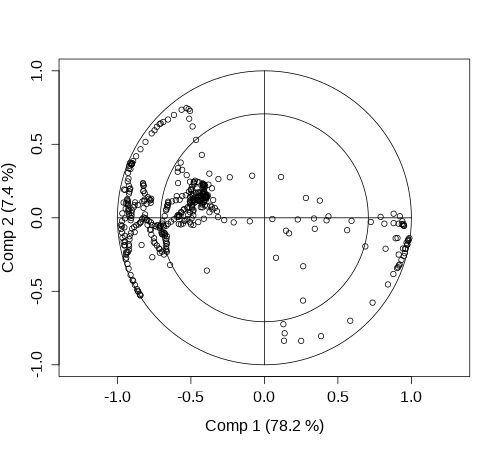

In [ ]:
%%R -w 500 -h 450 -u px
plot(pls_01, plottype = "correlation")

#### Evaluate PLS Model

In [ ]:
%%R
# predict on the calibration or training dataset
pred.train <- predict(pls_01, ncomp = nc, newdata = train)
pred.train.df<-as.data.frame(cbind(Obs=train$octane, Pred= pred.train))

In [ ]:
%%R
# predict on the test dataset
pred.test <- predict(pls_01, ncomp = nc, newdata = test)
pred.test.df<-as.data.frame(cbind(Obs=test$octane, Pred= pred.test))

In [ ]:
%%R
RMSEP(pls_01, newdata = test, ncomp = 1:5)

(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     1.5369       1.1696       0.2445       0.2341       0.3287       0.2780  



  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2

Attaching package: ‘ggpp’



    as_npc, as_npcx, as_npcy



    annotate




`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


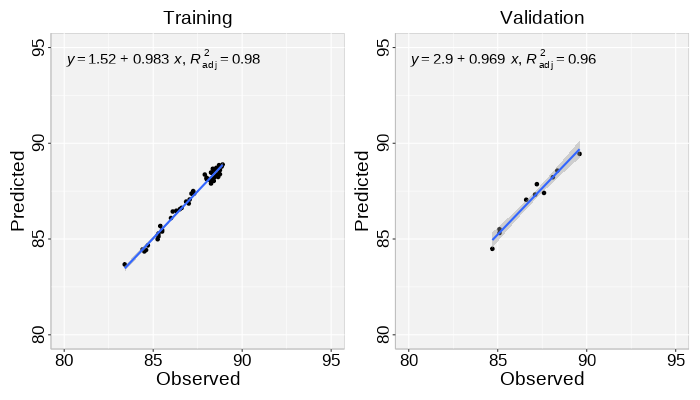

In [ ]:
%%R -w 700 -h 400 -u px
library(ggpmisc)
formula<-y~x

p1 = ggplot(pred.train.df, aes(Obs,Pred)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Training ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(80,95), breaks=seq(80, 95, 5))+
  scale_y_continuous(limits=c(80,95), breaks=seq(80, 95, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

p2 =ggplot(pred.test.df, aes(Obs,Pred)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Validation ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(80,95), breaks=seq(80, 95, 5))+
  scale_y_continuous(limits=c(80,95), breaks=seq(80, 95, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

library(patchwork)
p1+ p2

#### PLS with Preprocessing Multiplicative Scatter Correction (MSC)

Multiplicative Scatter (or Signal) Correction (MSC) is a preprocessing technique used to correct for multiplicative effects in spectroscopic data. It is particularly useful for removing baseline drift and scattering effects in spectral data. MSC is based on the assumption that the spectral data can be modeled as the product of a pure spectrum and a multiplicative effect. By dividing each spectrum by its estimated pure spectrum, the multiplicative effects can be removed, leading to a more accurate representation of the spectral data.

In [ ]:
%%R
# maximum number of components in the PLS model
maxc <- 10
# generate a PLS model based on calibration data
pls_02<- pls::plsr(octane ~ msc(NIR),
                      data = train,
                      ncomp = maxc,
                      validation = "CV")
summary(pls_02)

Data: 	X dimension: 50 401 
	Y dimension: 50 1
Fit method: kernelpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.545    1.307   0.2795   0.2533   0.2552   0.2423   0.2562
adjCV        1.545    1.308   0.2779   0.2527   0.2500   0.2385   0.2499
       7 comps  8 comps  9 comps  10 comps
CV      0.2536   0.2649   0.2751    0.2856
adjCV   0.2477   0.2577   0.2661    0.2751

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         82.09    92.56    95.73    96.53    97.78    98.19    98.56    98.78
octane    33.06    97.06    97.92    98.71    98.87    99.06    99.15    99.29
        9 comps  10 comps
X         98.98     99.11
octane    99.42     99.52


#### Optimum Number of components with cross-validation

Choosing the optimal number of components in a PLS model is crucial for achieving the best predictive performance. Cross-validation can be used to determine the number of components that minimize the prediction error. Here, we perform 10-fold cross-validation to find the optimal number of components for the PLS model.

`selectNcomp()` function from the {pls} package can be used to select the optimal number of components based on cross-validation results. The function performs k-fold cross-validation to estimate the prediction error for different numbers of components and selects the number of components that minimize the prediction error.

The approach `onesigma` simply returns the first model where the optimal CV is within one standard error of the absolute optimum

[1] 2


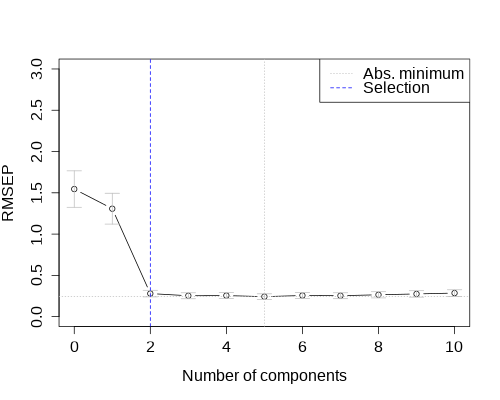

In [ ]:
%%R -w 500 -h 400 -u px
selectNcomp(pls_02, "onesigma", plot = TRUE, ylim = c(0, 3))

The `randomization` test approach checks whether the squared prediction errors of models with fewer components are significantly larger than in the reference model

[1] 2


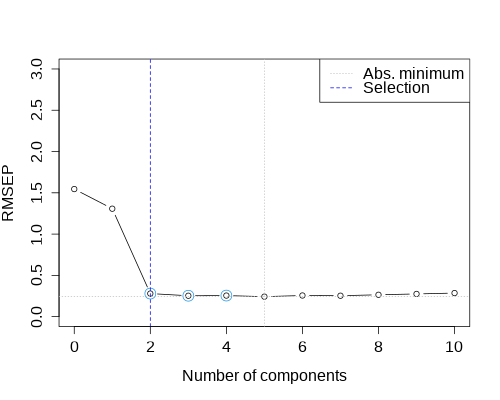

In [ ]:
%%R -w 500 -h 400 -u px
selectNcomp(pls_02, "randomization", plot = TRUE, ylim = c(0, 3))

### Partial Least Squares Regression with `pls::mvr()`


Alternatively, we can use the `pls::mvr()` function to perform `partial least squares regression (PLSR)`, `canonical powered partial least squares (CPPLS)` or `principal component regression (PCR)`, with a formula interface. Cross-validation can be used. Prediction, model extraction, plot, print and summary methods exist. `method = "oscorespls"` is used for PLSR model with the orthogonal scores algorithm (aka the NIPALS algorithm)., `method = "cppls"` for CPPLS and `method = "simpls"` for PLSR model with the SIMPLS algorithm. SIMPLS is much faster than the NIPALS algorithm, especially when the number of X variables increases, but gives slightly different results in the case of multivariate Y.


#### PLS with the Orthogonal Scores Algorithm (NIPALS)

The Nonlinear Iterative Partial Least Squares (NIPALS) algorithm is one of the most commonly used methods to compute solutions for Partial Least Squares (PLS) regression. PLS is a dimensionality reduction technique that projects high-dimensional data into a lower-dimensional space by maximizing the covariance between predictor ($𝑋$) and response ($𝑌$) variables.

In [ ]:
%%R
# maximum number of components in the PLS model
maxc <- 10
# generate a PLS model based on calibration data
pls_03 <- pls::mvr(octane ~ NIR,
                      data = train,
                      method = "oscorespls",
                      ncomp = maxc,
                      validation = "CV")
summary(pls_03)

Data: 	X dimension: 50 401 
	Y dimension: 50 1
Fit method: oscorespls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.545    1.348   0.3008   0.2573   0.2558   0.2450   0.2268
adjCV        1.545    1.345   0.2949   0.2549   0.2569   0.2397   0.2232
       7 comps  8 comps  9 comps  10 comps
CV      0.2272   0.2243   0.2491    0.2609
adjCV   0.2231   0.2203   0.2421    0.2528

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         78.17    85.58    93.41    96.06    96.94    97.89    98.38    98.85
octane    29.39    96.85    97.89    98.26    98.86    98.96    99.09    99.16
        9 comps  10 comps
X         99.02     99.19
octane    99.28     99.39


#### Canonical Powered Partial Least Squares (CPPLS)

Canonical Powered Partial Least Squares (CPPLS) is a multivariate statistical method that combines the features of Canonical Correlation Analysis (CCA) and Partial Least Squares (PLS) to model relationships between two sets of variables while emphasizing their shared canonical structure. This method is particularly useful in analyzing high-dimensional data where the number of variables exceeds the number of observations, such as in genomics, chemometrics, or systems biology.

In [ ]:
%%R
# maximum number of components in the PLS model
maxc <- 10
# generate a PLS model based on calibration data
pls_ccpls <- pls::mvr(octane ~ NIR,
                      data = train,
                      method = "cppls",
                      ncomp = maxc,
                      validation = "CV")
summary(pls_ccpls)

Data: 	X dimension: 50 401 
	Y dimension: 50 1
Fit method: cppls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.545    1.317   0.2970   0.2572   0.2557   0.2454   0.2280
adjCV        1.545    1.315   0.2853   0.2559   0.2562   0.2400   0.2248
       7 comps  8 comps  9 comps  10 comps
CV      0.2350   0.2301   0.2549    0.2701
adjCV   0.2308   0.2263   0.2477    0.2614

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         78.17    85.58    93.41    96.06    96.94    97.89    98.38    98.85
octane    29.39    96.85    97.89    98.26    98.86    98.96    99.09    99.16
        9 comps  10 comps
X         99.02     99.19
octane    99.28     99.39


#### PLSR model with the SIMPLS algorithm

The SIMPLS algorithm is a streamlined and computationally efficient approach for performing Partial Least Squares Regression (PLSR). Unlike the NIPALS algorithm, SIMPLS avoids iterative calculations for scores and directly computes the components in a simplified and mathematically elegant way. This makes SIMPLS particularly useful for large datasets.

In [ ]:
%%R
# maximum number of components in the PLS model
maxc <- 10
# generate a PLS model based on calibration data
pls_simple <- pls::mvr(octane ~ NIR,
                      data = train,
                      method = "simpls",
                      ncomp = maxc,
                      validation = "CV")
summary(pls_simple)

Data: 	X dimension: 50 401 
	Y dimension: 50 1
Fit method: simpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.545    1.354   0.2936   0.2490   0.2431   0.2389   0.2292
adjCV        1.545    1.352   0.2866   0.2473   0.2425   0.2331   0.2250
       7 comps  8 comps  9 comps  10 comps
CV      0.2321   0.2337   0.2436    0.2639
adjCV   0.2273   0.2293   0.2374    0.2561

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         78.17    85.58    93.41    96.06    96.94    97.89    98.38    98.85
octane    29.39    96.85    97.89    98.26    98.86    98.96    99.09    99.16
        9 comps  10 comps
X         99.02     99.19
octane    99.28     99.39


### Partial Least Squares Regression with `plsRglm` Package

The {plsRglm} package in R provides functions for fitting Partial Least Squares (PLS) regression models for Generalized Linear Models (GLMs). This package extends the traditional PLS regression to handle non-Gaussian response distributions, such as logistic regression, Poisson regression, and other GLMs. The `plsRglm()` function is used to fit PLS regression models for GLMs, allowing for flexible modeling of complex relationships between predictors and responses.

#### PLS Regression

We will use the `Cornell` dataset from the {plsRglm} package, which contains a  mixture experiment on X1, X2, X3, X4, X5, X6 and X7 to analyse octane degree (Y) in gazoline.

In [ ]:
%%R
data(Cornell)
str(Cornell)

'data.frame':	12 obs. of  8 variables:
 $ X1: num  0 0 0 0 0 0 0.17 0.17 0.17 0.17 ...
 $ X2: num  0.23 0.1 0 0.49 0 0.62 0.27 0.19 0.21 0.15 ...
 $ X3: num  0 0 0 0 0 0 0.1 0.1 0.1 0.1 ...
 $ X4: num  0 0 0.1 0 0.62 0 0.38 0.38 0.38 0.38 ...
 $ X5: num  0 0.12 0.12 0.12 0.12 0 0 0.02 0 0.02 ...
 $ X6: num  0.74 0.74 0.74 0.37 0.18 0.37 0 0.06 0.06 0.1 ...
 $ X7: num  0.03 0.04 0.04 0.02 0.08 0.01 0.08 0.08 0.08 0.08 ...
 $ Y : num  98.7 97.8 96.6 92 86.6 91.2 81.9 83.1 82.4 83.2 ...


##### PLS with K-fold Cross-Validation

We will use `cv.plsR()` function from the {plsRglm} package to perform Partial Least Squares (PLS) regression with k-fold cross-validation.  

In [ ]:
%%R
cv.pls.01<-cv.plsR(Y~.,data=Cornell,
                   nt=6,
                   K=6,
                   verbose = FALSE)

`cvtable()` of {plsRglm} provides a table summary summary of cross validated `PLSR` and `PLSGLR` models

In [ ]:
%%R
res.cv.pls.01<-cvtable(summary(cv.pls.01))
res.cv.pls.01

____************************************************____
____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Predicting X without NA neither in X nor in Y____
****________________________________________________****


NK: 1

CV Q2 criterion:
0 1 
0 1 

CV Press criterion:
1 2 3 4 
0 0 0 1 
$CVQ2

0 1 
0 1 

$CVPress

1 2 3 4 
0 0 0 1 

attr(,"class")
[1] "table.summary.cv.plsRmodel"


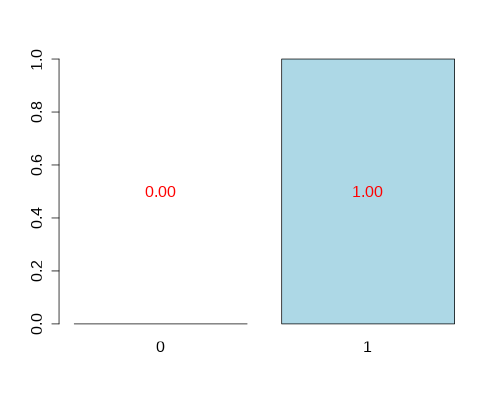

In [ ]:
%%R -w 500 -h 400 -u px
plot(res.cv.pls.01)

##### Fit PLS with Leave-One-Out Cross-Validation

We use the `plsR()` function from the {plsRglm} package to implement PLS Regression models with leave one out cross validation for complete or incomplete datasets. `typeVC` can be set to `standard` or `adaptative` for leave one out cross validation. Uf data contains missing values, use `typeVC = missingdata`.  `pvals.expli` is set to TRUE,  p-values be reported to tune model selection

In [ ]:
%%R
pls.01<-plsR(Y~.,
             data=Cornell,
             nt=6,
             typeVC="standard",
             pvals.expli=TRUE,
             verbose=FALSE)

In [ ]:
%%R
colSums(pls.01$pvalstep)

[1] 0 0 3 0 0 0


Table of Information Criteria can be obtained using `$InfCrit`

In [ ]:
%%R
pls.01$InfCrit

               AIC   Q2cum_Y LimQ2_Y        Q2_Y   PRESS_Y      RSS_Y      R2_Y
Nb_Comp_0 82.01205        NA      NA          NA        NA 467.796667        NA
Nb_Comp_1 53.15173 0.8966556  0.0975  0.89665563 48.344150  35.742486 0.9235940
Nb_Comp_2 41.08283 0.9175426  0.0975  0.20210989 28.518576  11.066606 0.9763431
Nb_Comp_3 32.06411 0.9399676  0.0975  0.27195907  8.056942   4.418081 0.9905556
Nb_Comp_4 33.76477 0.9197009  0.0975 -0.33759604  5.909608   4.309235 0.9907882
Nb_Comp_5 33.34373 0.9281373  0.0975  0.10506161  3.856500   3.521924 0.9924713
Nb_Comp_6 35.25533 0.9232562  0.0975 -0.06792167  3.761138   3.496074 0.9925265
          R2_residY  RSS_residY PRESS_residY   Q2_residY  LimQ2 Q2cum_residY
Nb_Comp_0        NA 11.00000000           NA          NA     NA           NA
Nb_Comp_1 0.9235940  0.84046633   1.13678803  0.89665563 0.0975    0.8966556
Nb_Comp_2 0.9763431  0.26022559   0.67059977  0.20210989 0.0975    0.9175426
Nb_Comp_3 0.9905556  0.10388893   0.18945488  0.2719

The evaluation of significant predictors associated with each component indicates that building only three components is optimal. This finding contrasts with the results from the AIC criteria, which recommend including five components, and the BIC, which also suggests five components. Moreover, the cross-validated Q² cumulative criterion supports the decision to retain three components during leave-one-out cross-validation. However, it suggests that only one component should be preserved when using six-fold cross-validation. This analysis underscores the importance of carefully considering various criteria to identify the most effective model structure.

To further refine our model, the six-fold cross-validation was conducted 100 times, with groups of samples randomly created for each iteration. The optimal number of components was determined based on the minimum cross-validated prediction error.

In [ ]:
%%R
set.seed(123)
cv.pls.02<-cv.plsR(Y~.,
                   data=Cornell,
                   nt=6,K=6,
                   NK=100,
                   random=TRUE,
                   verbose=FALSE)

In [ ]:
%%R
res.cv.pls.02=cvtable(summary(cv.pls.02))

____************************************************____
____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Predicting X without NA neither in X nor in Y____
****________________________________________________****


NK: 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
NK: 11,  12,  13,  14,  15,  16,  17,  18,  19,  20
NK: 21,  22,  23,  24,  25,  26,  27,  28,  29,  30
NK: 31,  32,  33,  34,  35,  36,  37,  38,  39,  40
NK: 41,  42,  43,  44,  45,  46,  47,  48,  49,  50
NK: 51,  52,  53,  54,  55,  56,  57,  58,  59,  60
NK: 61,  62,  63,  64,  65,  66,  67,  68,  69,  70
NK: 71,  72,  73,  74,  75,  76,  77,  78,  79,  80
NK: 81,  82,  83,  84,  85,  86,  87,  88,  89,  90
NK: 91,  92,  93,  94,  95,  96,  97,  98,  99,  100

CV Q2 criterion:
 0  1  2 
 0 87 13 

CV Press criterion:
 1  2  3  4  5 
 0  0 44 45 11 


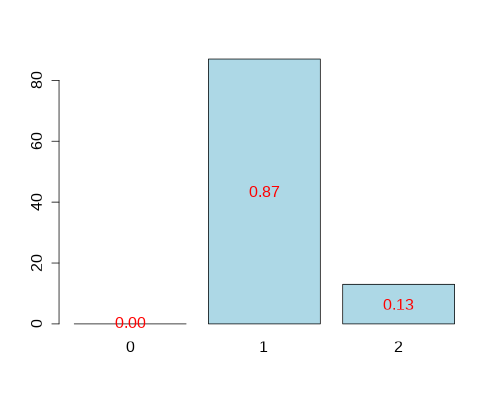

In [ ]:
%%R -w 500 -h 400 -u px
plot(res.cv.pls.02)

The results, based on the use of the $Q^2$ criterion, (Fig. 1) confirm those of the first 6-fold CV cross validation: we decide to retain 1 components which explain 87% of the variance. The $Q^2$ criterion is a measure of the predictive ability of the model. It is calculated as the proportion of the variance of the response variable that is predicted by the model. A high $Q^2$ value indicates a good predictive performance of the model.

We will refit the model with the 1 components:

In [ ]:
%%R
pls.02<-plsR(Y~.,
             data=Cornell,
             nt=1,
             p.vals.expli=TRUE,
             verbose=FALSE)

In [ ]:
%%R
pls.02$InfCrit

               AIC     RSS_Y     R2_Y R2_residY RSS_residY   AIC.std  DoF.dof
Nb_Comp_0 82.01205 467.79667       NA        NA 11.0000000 37.010388 1.000000
Nb_Comp_1 53.15173  35.74249 0.923594  0.923594  0.8404663  8.150064 2.740749
          sigmahat.dof   AIC.dof   BIC.dof GMDL.dof DoF.naive sigmahat.naive
Nb_Comp_0     6.521271 46.070884 47.789351 27.59461         1       6.521271
Nb_Comp_1     1.866528  4.569969  4.955816 21.34020         2       1.890568
          AIC.naive BIC.naive GMDL.naive
Nb_Comp_0 46.070884  47.78935   27.59461
Nb_Comp_1  4.169957   4.45882   18.37545


In [ ]:
%%R
pls.02$Coeffs

                 [,1]
Intercept  92.4321920
X1        -14.8845522
X2         -0.5942086
X3        -25.5423703
X4         -5.1075228
X5         14.1877035
X6          5.5177190
X7        -44.9000310


Modified weights (to be used with original matrix of predictor variables) can be obtained using `$wwetoile`

In [ ]:
%%R
pls.02$wwetoile

   Coord_Comp_1
X1  -0.43699629
X2  -0.03696135
X3  -0.43734182
X4  -0.36884361
X5   0.25772058
X6   0.51412193
X7  -0.38679886


We can also use automatic selection of the number of components using `sparse=TRUE` argument. The optimal number of components is determined based on the minimum cross-validated prediction error. `sparseStop = FALSE` argument is used to determine  should component extraction stop when no significant predictors are found.

In [ ]:
%%R
pls.03<- plsR(Y~.
              ,data=Cornell,
              nt = 6,
              sparse=TRUE,
              sparseStop=FALSE,
              verbose=FALSE)
pls.03

Number of required components:
[1] 6
Number of successfully computed components:
[1] 1
Coefficients:
                 [,1]
Intercept  92.4321920
X1        -14.8845522
X2         -0.5942086
X3        -25.5423703
X4         -5.1075228
X5         14.1877035
X6          5.5177190
X7        -44.9000310
Information criteria and Fit statistics:
               AIC     RSS_Y     R2_Y R2_residY RSS_residY   AIC.std  DoF.dof
Nb_Comp_0 82.01205 467.79667       NA        NA 11.0000000 37.010388 1.000000
Nb_Comp_1 53.15173  35.74249 0.923594  0.923594  0.8404663  8.150064 2.740749
          sigmahat.dof   AIC.dof   BIC.dof GMDL.dof DoF.naive sigmahat.naive
Nb_Comp_0     6.521271 46.070884 47.789351 27.59461         1       6.521271
Nb_Comp_1     1.866528  4.569969  4.955816 21.34020         2       1.890568
          AIC.naive BIC.naive GMDL.naive
Nb_Comp_0 46.070884  47.78935   27.59461
Nb_Comp_1  4.169957   4.45882   18.37545


#### PLS GLM Regression

The {plsRglm} package supports Partial Least Squares (PLS) GLM regression.  `cv.plsRglm` function  fits a PLS regression model for Generalized Linear Models (GLMs) and performs k-fold cross-validation to evaluate the model's predictive performance. the `modele` argument is set to `pls-glm-family` to fit a PLS regression model for GLMs. The family argument specifies the distribution of the response variable (e.g., `gaussian()` for Gaussian distribution, `binomial()` for binomial distribution). The K argument specifies the number of folds for cross-validation. The verbose argument is set to FALSE to suppress output messages.

In [ ]:
%%R
cv.pls.03<- cv.plsRglm(Y~.,
                   data=Cornell,
                   nt=3,
                   modele="pls-glm-family",
                   family=gaussian(),
                   K=12,
                   verbose=FALSE)

In [ ]:
%%R
res.cv.pls.03=cvtable(summary(cv.pls.03))

____************************************************____

Family: gaussian 
Link function: identity 

____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Predicting X without NA neither in X or Y____
****________________________________________________****


NK: 1

CV Q2Chi2 criterion:
0 1 2 
0 0 1 

CV PreChi2 criterion:
1 2 3 
0 0 1 


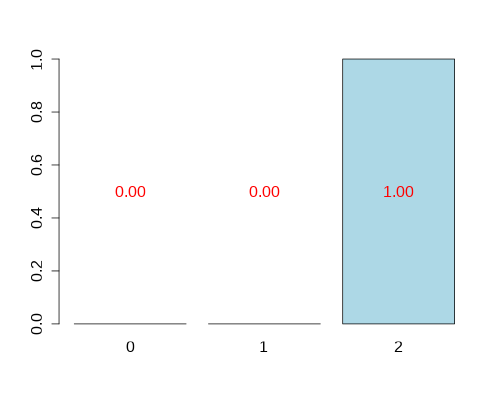

In [ ]:
%%R -w 500 -h 400 -u px
plot(res.cv.pls.03)

Now we fit the PLS GLM model using `plsRglm()` function with the 1  component based on cross-validation results.

In [ ]:
%%R
pls.04<- plsRglm(Y~.,
                   data=Cornell,
                   nt=1,
                   modele="pls-glm-family",
                   family=gaussian(),
                   K=12,
                   verbose=FALSE)
pls.04

Number of required components:
[1] 1
Number of successfully computed components:
[1] 1
Coefficients:
                 [,1]
Intercept  92.4321920
X1        -14.8845522
X2         -0.5942086
X3        -25.5423703
X4         -5.1075228
X5         14.1877035
X6          5.5177190
X7        -44.9000310
Information criteria and Fit statistics:
               AIC      BIC Chi2_Pearson_Y     RSS_Y     R2_Y R2_residY
Nb_Comp_0 82.01205 82.98186      467.79667 467.79667       NA        NA
Nb_Comp_1 53.15173 54.60645       35.74249  35.74249 0.923594  0.923594
          RSS_residY
Nb_Comp_0  467.79667
Nb_Comp_1   35.74249
Model with all the required components:

Call:  glm(formula = YwotNA ~ ., family = structure(list(family = "gaussian", 
    link = "identity", linkfun = function (mu) 
    mu, linkinv = function (eta) 
    eta, variance = function (mu) 
    rep.int(1, length(mu)), dev.resids = function (y, mu, wt) 
    wt * ((y - mu)^2), aic = function (y, n, mu, wt, dev) 
    {
        nobs <- 


#### PLS Binary Logistic Regression

The {plsRglm} package also supports Partial Least Squares (PLS) regression for binary logistic regression models. This is useful when the response variable is binary (e.g., 0 or 1) and the predictors are continuous or categorical variables.

We will use `azel` dataset from the {plsRglm} package, which contains information on patients with colon adenocarcinoma. The dataset has 104 observations on 33 binary qualitative explanatory variables and one response variable `y` representing the cancer stage according to the Astler-Coller classification. A microsatellite is a non-coding DNA sequence.

In [ ]:
%%R
data(aze_compl)
str(aze_compl)

'data.frame':	104 obs. of  34 variables:
 $ y      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ D2S138 : int  0 0 1 1 0 0 0 0 1 0 ...
 $ D18S61 : int  1 0 0 0 0 0 1 1 1 1 ...
 $ D16S422: int  1 1 0 0 1 0 0 1 1 0 ...
 $ D17S794: int  1 1 1 1 1 0 1 0 0 1 ...
 $ D6S264 : int  0 1 0 0 1 0 1 1 0 0 ...
 $ D14S65 : int  1 1 1 1 0 1 1 1 0 0 ...
 $ D18S53 : int  1 0 1 1 0 0 1 1 1 0 ...
 $ D17S790: int  0 1 0 0 1 0 1 0 0 1 ...
 $ D1S225 : int  0 1 0 0 0 0 1 0 1 0 ...
 $ D3S1282: int  0 0 1 0 0 0 1 1 0 0 ...
 $ D9S179 : int  1 1 1 0 0 0 0 0 1 1 ...
 $ D5S430 : int  1 1 0 1 1 0 1 0 1 0 ...
 $ D8S283 : int  1 1 0 1 0 0 0 1 1 0 ...
 $ D11S916: int  0 0 0 0 0 0 0 0 1 1 ...
 $ D2S159 : int  1 0 0 0 0 0 0 0 1 0 ...
 $ D16S408: int  1 1 0 1 0 0 1 1 1 0 ...
 $ D5S346 : int  0 1 0 1 0 0 0 1 1 0 ...
 $ D10S191: int  0 0 0 0 0 0 0 1 1 0 ...
 $ D13S173: int  1 1 1 1 1 0 0 1 0 1 ...
 $ D6S275 : int  0 1 1 0 0 1 1 0 1 1 ...
 $ D15S127: int  1 0 0 0 0 1 1 0 1 0 ...
 $ D1S305 : int  0 0 0 0 0 0 1 0 1 0 ...
 $ D4S394 : int 

##### PLS Logistic Model

We will use `cv.plsRglm` function from the {plsRglm} package to PLS logistic model with k-fold cross-validation. This function fits a PLS regression model for Generalized Linear Models (GLMs) and performs k-fold cross-validation to evaluate the model's predictive performance. The optimal number of components is selected based on the minimum cross-validated prediction error.

In [ ]:
%%R
cv.pls.logitic<- cv.plsRglm(y~.,data=aze_compl,
                            nt=10,
                            modele="pls-glm-logistic",
                            K=8,
                            NK=100,
                            keepcoeffs=TRUE,
                            verbose=FALSE)

In [ ]:
%%R
res.cv.pls.logitic<-cvtable(summary(cv.pls.logitic, MClassed=TRUE))
res.cv.pls.logitic

____************************************************____

Family: binomial 
Link function: logit 

____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
____Predicting X without NA neither in X or Y____
****________________________________________________****


NK: 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
NK: 11,  12,  13,  14,  15,  16,  17,  18,  19,  20
NK: 21,  22,  23,  24,  25,  26,  27,  28,  29,  30
NK: 31,  32,  33,  34,  35,  36,  37,  38,  39,  40
NK: 41,  42,  43,  44,  45,  46,  47,  48,  49,  50
NK: 51,  52,  53,  54,  55,  56,  57,  58,  59,  60
NK: 61,  62,  63,  64,  65,  66,  67,  68,  69,  70
NK: 71,  72,  73,  74,  75,  76,  77,  78,  79,  80
NK: 81,  82,  83,  84,  85,  86,  87,  88,  89,  90
NK: 91,  92,  93,  94,  95,  96,  97,  98,  99,  100

CV MissClassed criterion:
 1

We will fit the model with  options `sparse` and `sparseStop` allows  automatic selection of the number of components

In [ ]:
%%R
pls.logitic<- plsRglm(y~.,data=aze_compl,
                         nt = 10,
                         modele = "pls-glm-logistic",
                         sparse=TRUE,
                         sparseStop=FALSE,
                         Verbose=FALSE)

____************************************************____

Family: binomial 
Link function: logit 

____Component____ 1 ____
____Component____ 2 ____
No more significant predictors (<0.05) found
Warning only 2 components were thus extracted
____Predicting X without NA neither in X or Y____
****________________________________________________****



In [ ]:
%%R
pls.logitic$Coeffs

                 [,1]
Intercept  0.66673651
D2S138    -0.16796545
D18S61     0.46735449
D16S422   -0.16778289
D17S794    0.20339823
D6S264    -0.18230804
D14S65    -0.16385957
D18S53    -0.01692114
D17S790   -0.28081191
D1S225    -0.13400471
D3S1282   -0.40437244
D9S179    -0.07752464
D5S430    -0.25202840
D8S283     0.19376982
D11S916    1.67029903
D2S159    -0.03694535
D16S408   -0.04063618
D5S346     1.19262106
D10S191   -0.29584487
D13S173    0.27436428
D6S275    -0.53388897
D15S127    0.08810873
D1S305     0.07577672
D4S394    -0.36089261
D20S107   -0.28711182
D1S197    -0.42386989
D1S207     0.05339395
D10S192    0.07032459
D3S1283   -0.54510436
D4S414    -0.36977999
D8S264     0.28385236
D22S928   -0.08634543
TP53      -0.83781656
D9S171    -0.28883592


In [ ]:
%%R
pls.logitic$InfCrit

               AIC      BIC Missclassed Chi2_Pearson_Y    RSS_Y       R2_Y
Nb_Comp_0 145.8283 148.4727          49       104.0000 25.91346         NA
Nb_Comp_1 138.4127 143.7015          37       104.2119 23.61317 0.08876823
Nb_Comp_2 121.6725 129.6057          30       103.5838 19.55167 0.24550140
          R2_residY RSS_residY
Nb_Comp_0        NA   25.91346
Nb_Comp_1 -2.309104   85.75035
Nb_Comp_2 -5.773453  175.52362


##### PLS Probit Model

PLS probit model can be fit using `cv.plsRglm` function from the {plsRglm} package. The family argument specifies the distribution of the response variable (e.g., `binomial(link="probit")` for probit regression). The K argument specifies the number of folds for cross-validation. The NK argument specifies the number of iterations for the randomization test. The keepcoeffs argument is set to TRUE to retain the coefficients of the model. The verbose argument is set to FALSE to suppress output messages.

In [ ]:
%%R
cv.pls.probit<- cv.plsRglm(y~.,data=aze_compl,
                            nt=10,
                            modele="pls-glm-family",
                            family=binomial(link=probit),
                            K=8,
                            NK=100,
                            keepcoeffs=TRUE,
                            verbose=FALSE)

In [ ]:
%%R
res.cv.pls.probit<-cvtable(summary(cv.pls.probit, MClassed=TRUE))
res.cv.pls.probit

____************************************************____

Family: binomial 
Link function: probit 

____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
____Predicting X without NA neither in X or Y____
****________________________________________________****


NK: 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
NK: 11,  12,  13,  14,  15,  16,  17,  18,  19,  20
NK: 21,  22,  23,  24,  25,  26,  27,  28,  29,  30
NK: 31,  32,  33,  34,  35,  36,  37,  38,  39,  40
NK: 41,  42,  43,  44,  45,  46,  47,  48,  49,  50
NK: 51,  52,  53,  54,  55,  56,  57,  58,  59,  60
NK: 61,  62,  63,  64,  65,  66,  67,  68,  69,  70
NK: 71,  72,  73,  74,  75,  76,  77,  78,  79,  80
NK: 81,  82,  83,  84,  85,  86,  87,  88,  89,  90
NK: 91,  92,  93,  94,  95,  96,  97,  98,  99,  100

CV MissClassed criterion:
 

We will fit the model with  options `sparse` and `sparseStop` allows  automatic selection of the number of components

In [ ]:
%%R
pls.probit<- plsRglm(y~.,data=aze_compl,
                         nt = 10,
                        modele="pls-glm-family",
                        family=binomial(link=probit),
                         sparse=TRUE,
                         sparseStop=FALSE,
                         Verbose=FALSE)

____************************************************____

Family: binomial 
Link function: probit 

____Component____ 1 ____
____Component____ 2 ____
No more significant predictors (<0.05) found
Warning only 2 components were thus extracted
____Predicting X without NA neither in X or Y____
****________________________________________________****



In [ ]:
%%R
pls.probit$InfCrit

               AIC      BIC Missclassed Chi2_Pearson_Y    RSS_Y       R2_Y
Nb_Comp_0 145.8283 148.4727          49       104.0000 25.91346         NA
Nb_Comp_1 138.4337 143.7224          37       104.1757 23.61811 0.08857757
Nb_Comp_2 121.6612 129.5944          31       102.5255 19.60828 0.24331678
          R2_residY RSS_residY
Nb_Comp_0        NA   25.91346
Nb_Comp_1 -1.363062   61.23511
Nb_Comp_2 -2.129611   81.09906


#### PLS Ordinal Logistic Regression

The {plsRglm} package also supports Partial Least Squares (PLS) regression for ordinal logistic regression models. This is useful when the response variable is ordinal (e.g., 1, 2, 3) and the predictors are continuous or categorical variables.

We will use `bordeaux` dataset from the {plsRglm} package, which contains information on the quality of Bordeaux wines (Quality) and four potentially predictive variables (Temperature, Sunshine, Heat and Rain).

In [ ]:
%%R
data(bordeaux)
str(bordeaux)

'data.frame':	34 obs. of  5 variables:
 $ Temperature: int  3064 3000 3155 3085 3245 3267 3080 2974 3038 3318 ...
 $ Sunshine   : int  1201 1053 1133 970 1258 1386 966 1189 1103 1310 ...
 $ Heat       : int  10 11 19 4 36 35 13 12 14 29 ...
 $ Rain       : int  361 338 393 467 294 225 417 488 677 427 ...
 $ Quality    : Ord.factor w/ 3 levels "1"<"2"<"3": 2 3 2 3 1 1 3 3 3 2 ...


For ordinal logistic regression, the response variable must be converted to an ordered factor using the `factor()` function with the `ordered = TRUE` argument. This ensures that the levels of the factor are ordered according to their natural order (e.g., low < medium < high).

In [ ]:
%%R
bordeaux$Quality<-factor(bordeaux$Quality,ordered=TRUE)

In [ ]:
%%R
pls.ordinal<- plsRglm(Quality~.,data=bordeaux,
                         nt = 10,
                        modele="pls-glm-polr",
                        sparse=TRUE,
                         sparseStop=FALSE,
                         Verbose=FALSE)
pls.ordinal

____************************************************____

Model: pls-glm-polr 
Method: logistic 

____Component____ 1 ____
No more significant predictors (<0.05) found
Warning only 1 components were thus extracted
____Predicting X without NA neither in X or Y____
****________________________________________________****

Number of required components:
[1] 10
Number of successfully computed components:
[1] 1
Coefficients:
                     [,1]
1|2         -51.666241946
2|3         -47.102095313
Temperature   0.010837904
Sunshine      0.013401580
Heat          0.108779837
Rain         -0.009953149
Information criteria and Fit statistics:
               AIC      BIC Missclassed Chi2_Pearson_Y
Nb_Comp_0 78.64736 81.70009          22      62.333333
Nb_Comp_1 36.50286 41.08194           6       9.356521


#### PLS Poisson Regression

The {plsRglm} package also supports Partial Least Squares (PLS) regression for Poisson regression models. This is useful when the response variable is a count variable (e.g., number of events) and the predictors are continuous or categorical variables.

The 'rock` data set from the {pls} package contains information on the chemical composition of 48 rock samples. The dataset includes 3 variables representing the properties of the rock (response variable).

In [ ]:
%%R
data(rock)
str(rock)

'data.frame':	48 obs. of  4 variables:
 $ area : int  4990 7002 7558 7352 7943 7979 9333 8209 8393 6425 ...
 $ peri : num  2792 3893 3931 3869 3949 ...
 $ shape: num  0.0903 0.1486 0.1833 0.1171 0.1224 ...
 $ perm : num  6.3 6.3 6.3 6.3 17.1 17.1 17.1 17.1 119 119 ...


In [ ]:
%%R
pls.poisson<- plsRglm(area~.,data=rock,
                         nt = 6,
                        modele="pls-glm-family",
                        family="poisson",
                        sparse=TRUE,
                        sparseStop=FALSE,
                        Verbose=FALSE)


____************************************************____

Family: poisson 
Link function: log 

____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
Warning only 3 components could thus be extracted
____Predicting X without NA neither in X or Y____
****________________________________________________****



In [ ]:
%%R
pls.poisson$InfCrit

               AIC      BIC Chi2_Pearson_Y     RSS_Y      R2_Y R2_residY
Nb_Comp_0 54058.40 54060.28       47100.15 338543101        NA        NA
Nb_Comp_1 30974.39 30978.13       28213.06 173018641 0.4889317 -7.306895
Nb_Comp_2 16195.55 16201.16       15193.69  79812992 0.7642457 -7.306851
Nb_Comp_3 15863.13 15870.61       14805.29  80131766 0.7633041 -7.306850
          RSS_residY
Nb_Comp_0  338543101
Nb_Comp_1 2812241917
Nb_Comp_2 2812227119
Nb_Comp_3 2812226783


## Summary and Conclusion

This tutorial provides an overview of Partial Least Squares (PLS) regression in R using the `pls` and `plsRglm` packages. PLS regression is a powerful multivariate statistical technique that can handle high-dimensional data and complex relationships between predictors and responses. The `pls` package offers a comprehensive set of functions for fitting PLS models, performing cross-validation, and visualizing results. The `plsRglm` package extends PLS regression to handle Generalized Linear Models (GLMs) with non-Gaussian response distributions. It provides functions for fitting PLS regression models for GLMs, including logistic regression, Ordinal, Poisson regression, and other GLMs. The tutorial demonstrates how to fit PLS regression models, perform cross-validation, and evaluate model performance using these packages. The examples cover a range of applications, including predicting octane numbers from NIR spectral data, analyzing chemical composition data, and modeling cancer stage in patients with colon adenocarcinoma. By using the `pls` and `plsRglm` packages, researchers can leverage the power of PLS regression to analyze complex datasets and build predictive models for a wide range of applications.







## References

1. [Introduction to the pls Package](https://cran.r-project.org/web/packages/pls/vignettes/pls-manual.pdf)

2.  [Partial Least Squares in R (Step-by-Step)](https://www.statology.org/partial-least-squares-in-r/)

3.  [Multivariate Regression](https://brilliant.org/wiki/multivariate-regression/)

4.  [plsRglm](https://fbertran.github.io/plsRglm/)

5. [Getting started with mdatools for R](https://mdatools.com/docs/mdatools-tutorial.pdf)

